<a href="https://colab.research.google.com/github/WittmannF/course-v4/blob/master/book-notes/ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 358kB 2.7MB/s 
     |████████████████████████████████| 40kB 5.0MB/s 


In [2]:
from fastai.vision.all import *

In [9]:
path = untar_data(URLs.MNIST_SAMPLE)

In [10]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train')]

In [11]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [12]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [13]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [15]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

## First Try: Pixel Similarity

In [21]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]

In [22]:
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [24]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [26]:
matplotlib.rc('image', cmap='Greys')

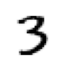

In [27]:
show_image(three_tensors[1]);

In [29]:
len(seven_tensors)

6265

In [30]:
seven_tensors[0].shape

torch.Size([28, 28])

In [33]:
torch.stack(seven_tensors).shape

torch.Size([6265, 28, 28])

In [36]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [37]:
stacked_threes.ndim

3

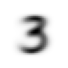

In [38]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

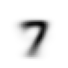

In [39]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

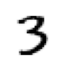

In [40]:
a_3 = stacked_threes[1]
show_image(a_3);

In [44]:
(a_3-mean3).abs().mean()

tensor(0.1114)

In [47]:
(a_3-mean7).abs().mean()

tensor(0.1586)

In [46]:
((a_3-mean3)**2).mean().sqrt()

tensor(0.2021)

In [48]:
((a_3-mean7)**2).mean().sqrt()

tensor(0.3021)

In [50]:
F.l1_loss(a_3.float(), mean3)

tensor(0.1114)

In [53]:
F.mse_loss(a_3.float(), mean3).sqrt()

tensor(0.2021)

In [54]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [55]:
(a_3-mean3).abs().mean((-1, -2))

tensor(0.1114)

In [58]:
def mnist_distance(a,b): 
    return (a-b).abs().mean()

mnist_distance(a_3, mean3)#(-1,-2)

tensor(0.1114)

In [59]:
mnist_distance(valid_3_tens, mean3)

tensor(0.1296)

In [61]:
(valid_3_tens-mean3).abs().shape

torch.Size([1010, 28, 28])

In [62]:
(valid_3_tens-mean3).abs().mean((-1, -2))

tensor([0.1342, 0.1128, 0.1320,  ..., 0.1202, 0.1381, 0.1494])

In [63]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [64]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1342, 0.1128, 0.1320,  ..., 0.1202, 0.1381, 0.1494]),
 torch.Size([1010]))

In [66]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [67]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [68]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

But let's be honest: 3s and 7s are very different-looking digits. And we're only classifying 2 out of the 10 possible digits so far. So we're going to need to do better!

To do better, perhaps it is time to try a system that does some real learning—that is, that can automatically modify itself to improve its performance. In other words, it's time to talk about the training process, and SGD.

In [69]:
def f(x): return x**2

In [72]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

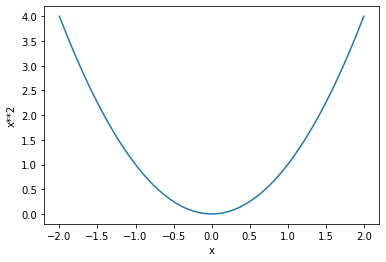

In [73]:
plot_function(f, 'x', 'x**2')

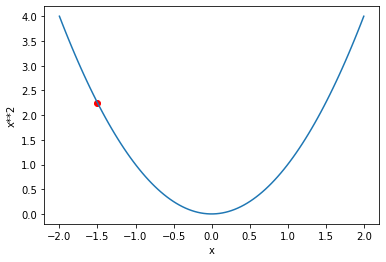

In [74]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [75]:
xt = tensor(3.).requires_grad_()

In [76]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [77]:
yt.backward()

In [78]:
xt.grad

tensor(6.)

If you remember your high school calculus rules, the derivative of x**2 is 2*x, and we have x=3, so the gradients should be 2*3=6, which is what PyTorch calculated for us!

In [79]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [80]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [81]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

## An End-to-End SGD Example
Imagine you were measuring the speed of a roller coaster as it went over the top of a hump. It would start fast, and then get slower as it went up the hill; it would be slowest at the top, and it would then speed up again as it went downhill. You want to build a model of how the speed changes over time. If you were measuring the speed manually every second for 20 seconds, it might look something like this:


In [82]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

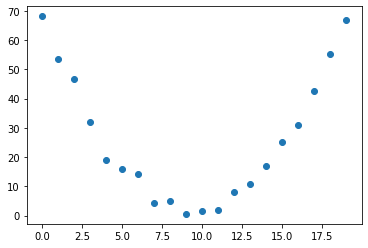

In [83]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

We've added a bit of random noise, since measuring things manually isn't precise. This means it's not that easy to answer the question: what was the roller coaster's speed? Using SGD we can try to find a function that matches our observations. We can't consider every possible function, so let's use a guess that it will be quadratic; i.e., a function of the form `a*(time**2)+(b*time)+c`

We want to distinguish clearly between the function's input (the time when we are measuring the coaster's speed) and its parameters (the values that define which quadratic we're trying). So, let's collect the parameters in one argument and thus separate the input, t, and the parameters, params, in the function's signature:

In [84]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In other words, we've restricted the problem of finding the best imaginable function that fits the data, to finding the best quadratic function. This greatly simplifies the problem, since every quadratic function is fully defined by the three parameters a, b, and c. Thus, to find the best quadratic function, we only need to find the best values for a, b, and c.

If we can solve this problem for the three parameters of a quadratic function, we'll be able to apply the same approach for other, more complex functions with more parameters—such as a neural net. Let's find the parameters for f first, and then we'll come back and do the same thing for the MNIST dataset with a neural net.

We need to define first what we mean by "best." We define this precisely by choosing a loss function, which will return a value based on a prediction and a target, where lower values of the function correspond to "better" predictions. For continuous data, it's common to use mean squared error:

In [85]:
def mse(preds, targets): return ((preds-targets)**2).mean()


In [86]:
params = torch.randn(3).requires_grad_()

In [87]:
orig_params = params.clone()

In [88]:
preds = f(time, params)

In [89]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

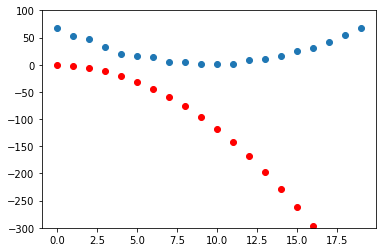

In [90]:
show_preds(preds)

In [91]:
loss = mse(preds, speed)
loss

tensor(47897.7344, grad_fn=<MeanBackward0>)

In [92]:
loss.backward()
params.grad

tensor([-72939.7031,  -4688.3979,   -340.1837])

In [93]:
params.grad * 1e-5

tensor([-0.7294, -0.0469, -0.0034])

In [94]:
params

tensor([-1.1197, -0.6340,  0.2496], requires_grad=True)

In [95]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [96]:
preds = f(time,params)
mse(preds, speed)

tensor(9566.5859, grad_fn=<MeanBackward0>)

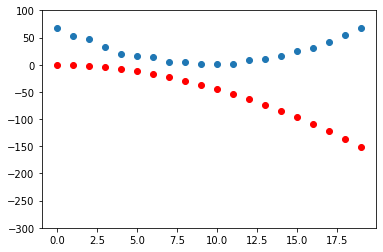

In [97]:
show_preds(preds)

In [98]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [99]:
for i in range(10): apply_step(params)

9566.5859375
2313.1572265625
940.5831909179688
680.8466796875
631.6929321289062
622.3880004882812
620.6237182617188
620.2862548828125
620.2186279296875
620.202392578125


In [100]:
params = orig_params.detach().requires_grad_()

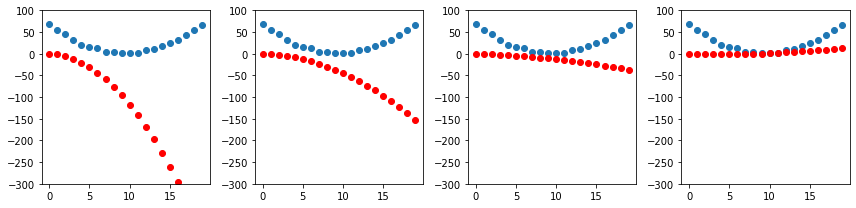

In [101]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()